In [1]:
"""
Example of building a Multi-layer Perceptron with PyTorch
Shows how to use optimizer to simplify steps.
Shows how to break down optimization into batches.

"""

import torch
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import time

D:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Display contour plot of f at all points (x[i],y[j])
def contour_plot1(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])
    X=torch.tensor(p,dtype=torch.float32)
    fp=f(X)
    z=fp.reshape(xx.shape).detach().numpy()
    plt.contourf(x,y,z,n_levels)


In [3]:
n_samples=150

Xnp, ynp = make_blobs(n_samples=n_samples, centers = [(1, 1), (5, 3), (7, 1)], n_features=2)
ynp[ynp==2]=0 # Blob2 relabelled as 0

X=torch.tensor(Xnp,dtype=torch.float32)
y=torch.tensor(ynp[:,np.newaxis],dtype=torch.float32)

N_hidden=10  # Number of dimensions of hidden layer

In [4]:
# Use the nn package to define a model as a sequence of layers. 
# nn.Sequential is a Module which contains other Modules, 
# and applies them in sequence to produce its output. 
# Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, N_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(N_hidden, 1),
    torch.nn.Sigmoid()
)

# Use Binary Cross Entropy as loss function.
loss_fn = torch.nn.BCELoss()

# Define optimizer and show it the parameters
learning_rate=1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [5]:
# Number of samples per batch
# Must divide number of samples exactly
batch_size=50

# Number of complete passes through all data
n_epochs=1000

In [6]:
start_time=time.perf_counter()

for ep in range(n_epochs):
    # Randomly permute the data so it is presented
    # in a different order in each epoch
    perm=np.random.permutation(n_samples)
    
    # Total loss is sum over all batches
    total_loss=0
    
    for b in range(round(n_samples/batch_size)):
        # Pick out the b-th chunk of the data
        batch_perm=perm[b*batch_size:(b+1)*batch_size]
        y_pred = model(X[batch_perm])
    
        loss = loss_fn(y_pred, y[batch_perm])
        total_loss+=loss.item()
   
        # Zero the gradients before running the backward pass.
        model.zero_grad()
    
        # Compute gradients. 
        loss.backward()
    
        # Use the optimizer to update the weights
        optimizer.step()
            
    if ((ep+1)%100==0):  # Print every 100th epoch
        print(ep+1, total_loss)
 
end_time =time.perf_counter()
print("Total time spent optimizing: {:0.1f}sec.".format(end_time-start_time))

100 1.6440913081169128
200 1.3088887333869934
300 1.0438079237937927
400 0.8674063980579376
500 0.7587249726057053
600 0.6931703835725784
700 0.6528881639242172
800 0.6272076368331909
900 0.6106142103672028
1000 0.5990457385778427
Total time spent optimizing: 2.6sec.


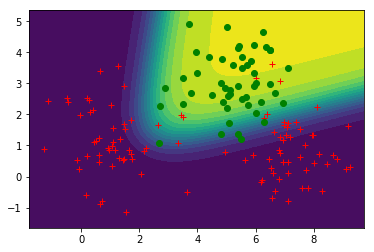

In [7]:
# Create a grid of points
px = np.arange(Xnp[:,0].min()-0.5, Xnp[:,0].max()+0.5, 0.1)
py = np.arange(Xnp[:,1].min()-0.5, Xnp[:,1].max()+0.5, 0.1)


# Use different colours for different classes
X0=Xnp[ynp==0] # Select samples for class 0
X1=Xnp[ynp==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(px,py,model,15)
